# Setup

In [117]:
!pip install spotipy
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

random.seed(43)

In [2]:
cid = '7fdd73fc6c4b4d998af5720f355ac07d'
secret = '0f59b9f54aa94de08f5ef341cf5b01d7'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [3]:
features = ["name", "danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "tempo", "acousticness", "key", "mode", "time_signature"]
audio_features = features[1:]

In [4]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    tracks = [track['track']['id'] for track in tracks if track['track']]
    return tracks

In [5]:
def call_playlist(creator, playlist_id):

    playlist_df = pd.DataFrame(columns = features)
    track_ids = get_playlist_tracks(creator, playlist_id)

    # audio_features = sp.audio_features(track_ids)
    # for track_features, track_id in zip(audio_features, track_ids):
    #   if track_features:
    #     track_features['name'] = sp.track(track_id)['name']
    #     track_features['id'] = track_id  # Add track_id to the features
    #     playlist_df = pd.concat([playlist_df, pd.DataFrame([track_features])], ignore_index=True)

    for track_id in track_ids:
        track_features = {'id': track_id}  # Add track_id to the features
        audio_features = sp.audio_features(track_id)[0]

        if audio_features:
            track_features['name'] = sp.track(track_id)['name']
            track_features.update({feature: audio_features[feature] for feature in features if feature != 'name'})

            track_df = pd.DataFrame(track_features, index=[0])
            playlist_df = pd.concat([playlist_df, track_df], ignore_index=True)

    # for track_id in track_ids:

    #     track_features = dict()
    #     audio_features = sp.audio_features(track_id)[0]
    #     if audio_features:
    #       for feature in features:
    #         if feature == 'name':
    #           track_features[feature] = sp.track(track_id)['name']
    #         else:
    #           track_features[feature] = audio_features[feature]

    #     #audio_analysis = sp.audio_analysis(track_id)['track']
    #     #for feature in audio_analysis_list:  track_features[feature] = audio_analysis[feature]

    #       track_df = pd.DataFrame(track_features, index = [0])
    #       playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    return playlist_df


In [ ]:
# car_songs = call_playlist("Spotify", "37i9dQZF1DWWMOmoXKqHTD")

In [ ]:
# car_songs.head()

# Mood Mapping

## Defining Moods - Ignore

In [ ]:
# moods list: happy, sad, chill, angry, party, instrumental, romance, spiritual

In [ ]:
# happy1 = call_playlist(creator = "", playlist_id = '37i9dQZF1DXdPec7aLTmlC') #happy hits - spotify
# happy2 = call_playlist(creator = "", playlist_id = '37i9dQZF1DWZKuerrwoAGz') #happy favorites - spotify
# happy3 = call_playlist(creator = "", playlist_id = '37i9dQZF1DWSf2RDTDayIx') #happy beats - spotify
# happy4 = call_playlist(creator = "", playlist_id = '37i9dQZF1DXcNb6Ba0LuVc') #feel good beats - spotify
# happy5 = call_playlist(creator = "", playlist_id = '37i9dQZF1DWVlYsZJXqdym')
# happy_playlist_data = pd.concat([happy1, happy2, happy3, happy4, happy5])

In [ ]:
# happy_playlist_data = happy_playlist_data.iloc[:, 1:]
# happy_playlist_data.reset_index()
# happy_playlist_data.to_csv('happy_2.csv')

In [ ]:
# sad1 = call_playlist("sadhour", '37i9dQZF1DWSqBruwoIXkA')
# sad2 = call_playlist("sadsongs", '37i9dQZF1DX7qK8ma5wgG1')
# sad3 = call_playlist("sadbops", '37i9dQZF1DWZUAeYvs88zc')
# sad4 = call_playlist("sadbeats", '37i9dQZF1DWVrtsSlLKzro')
# sad5 = call_playlist("", "37i9dQZF1DWYfVqUciU2jI")
# sad_playlist_data = pd.concat([sad1,sad2,sad3,sad4,sad5])

In [ ]:
# sad_playlist_data = sad_playlist_data.iloc[:, 1:]
# sad_playlist_data.reset_index()
# sad_playlist_data.to_csv(path_or_buf='/sad_data')

In [ ]:
# party1 = call_playlist("", '37i9dQZF1DWY4xHQp97fN6')
# party2 = call_playlist("", '37i9dQZF1DX6GwdWRQMQpq')
# party3 = call_playlist("", '37i9dQZF1DX66m4icL86Ru')
# party4 = call_playlist("", '37i9dQZF1DXa2PvUpywmrr')
# party5 = call_playlist("", "37i9dQZF1DX7e8TjkFNKWH")
# party_playlist_data = pd.concat([party1, party2, party3, party4, party5])

In [ ]:
# party_playlist_data = party_playlist_data.iloc[:, 1:]
# party_playlist_data.reset_index()
# party_playlist_data.to_csv('party.csv')

In [ ]:
# chill1 = call_playlist(creator = "",playlist_id = '6IKQrtMc4c00YzONcUt7QH')
# chill2 = call_playlist(creator = "", playlist_id='37i9dQZF1DX6VdMW310YC7')
# chill3 = call_playlist(creator = "", playlist_id ='37i9dQZF1DXdLK5wjKyhVm')
# chill4 = call_playlist(creator = "", playlist_id ='37i9dQZF1DX2UgsUIg75Vg')
# chill5 = call_playlist("Lowkey", "37i9dQZF1DX2yvmlOdMYzV")
# chill_playlist_data = pd.concat([chill1, chill2, chill3, chill4, chill5])

In [ ]:
# chill_playlist_data = chill_playlist_data.iloc[:, 1:]
# chill_playlist_data.reset_index()
# chill_playlist_data.to_csv('chill.csv')

In [ ]:
# angry1 = call_playlist("", '37i9dQZF1EIgNZCaOGb0Mi')
# angry2 = call_playlist("", '37i9dQZF1EIhuCNl2WSFYd')
# angry3 = call_playlist("", '4wrkUhohpvfNEIBgGtGeEK')
# angry4 = call_playlist("", '2h9aIhyq12WTvliYlpPRoh')
# angry5 = call_playlist("", '6DPfBIRtaEivNlJRx2d2Ge')

In [ ]:
# angry_playlist_data = pd.concat([angry1, angry2, angry3, angry4, angry5])
# angry_playlist_data = angry_playlist_data.iloc[:, 1:]
# angry_playlist_data.reset_index()
# angry_playlist_data.to_csv('angry.csv')

In [ ]:
# instrument1 = call_playlist("", '37i9dQZF1DX9j444F9NCBa')
# instrument2 = call_playlist("", '37i9dQZF1DX0khTY3HFA4M')
# instrument3 = call_playlist("", '37i9dQZF1DX9sIqqvKsjG8')
# instrument4 = call_playlist("", '37i9dQZF1DX7hmlhGsyxU0')
# instrument5 = call_playlist("", '37i9dQZF1DX9j444F9NCBa')

In [ ]:
# instrument_playlist_data = pd.concat([instrument1, instrument2, instrument3, instrument4, instrument5])
# instrument_playlist_data = instrument_playlist_data.iloc[:, 1:]
# instrument_playlist_data.reset_index()
# instrument_playlist_data.to_csv('instrument.csv')

In [ ]:
# romance1 = call_playlist("", '37i9dQZF1DX19jOGJFjAzV')
# romance2 = call_playlist("", '37i9dQZF1DX4s3V2rTswzO')
# romance3 = call_playlist("", '37i9dQZF1EVGJJ3r00UGAt')
# romance4 = call_playlist("", '37i9dQZF1DX89uMZWcnk7G')
# romance5 = call_playlist("", '37i9dQZF1DX6DLB6M8zkNk')

In [ ]:
# romance_playlist_data = pd.concat([romance1, romance2, romance3, romance4, romance5])
# romance_playlist_data = romance_playlist_data.iloc[:, 1:]
# romance_playlist_data.reset_index()
# romance_playlist_data.to_csv('romance.csv')

In [ ]:
# spirit1 = call_playlist("", '37i9dQZF1EIfHP8w1TxuOq')
# spirit2 = call_playlist("", '37i9dQZF1EIdTIIHPoG3Yo')
# spirit3 = call_playlist("", '37i9dQZF1EIhhnk5FnzYff')
# spirit4 = call_playlist("", '37i9dQZF1EIdTIIHPoG3Yo')
# spirit5 = call_playlist("", '37i9dQZF1DXdE1pRJvqV46')

In [ ]:
# spirit_playlist_data = pd.concat([spirit1, spirit2, spirit3, spirit4, spirit5])
# spirit_playlist_data = spirit_playlist_data.iloc[:, 1:]
# spirit_playlist_data.reset_index()
# spirit_playlist_data.to_csv('spirit_2.csv')

## Data Preparation

In [143]:
angry = pd.read_csv('angry.csv').iloc[:, 1:]
angry['mood'] = 'angry'
chill = pd.read_csv('chill.csv').iloc[:, 1:]
chill['mood'] = 'chill'
happy = pd.read_csv('happy.csv').iloc[:, 1:]
happy['mood'] = 'happy'
instrument = pd.read_csv('instrument.csv').iloc[:, 1:]
instrument['mood'] = 'instrumental'
party = pd.read_csv('party.csv').iloc[:, 1:]
party['mood'] = 'party'
romance = pd.read_csv('romance.csv').iloc[:, 1:]
romance['mood'] = 'romance'
sad = pd.read_csv('sad.csv').iloc[:, 1:]
sad['mood'] = 'sad'
# spirit = pd.read_csv('spirit.csv').iloc[:, 1:]
# spirit['mood'] = 'spiritual'

In [144]:
df = pd.concat([angry, chill, happy, instrument, party, romance, sad]).reset_index(drop = True)
df = df.iloc[:, :-1]
df.dropna(inplace = True)
X = df[audio_features]
y = df['mood']
#print(set(y))

In [145]:
# normalize X
X_norm = (X - X.min()) / (X.max() - X.min())
X = X_norm

In [12]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [14]:
X_train.shape

(3885, 11)

In [15]:
y_train.head()

4198      sad
3532    party
573     chill
4080      sad
4491      sad
Name: mood, dtype: object

## Model Selection

In [ ]:
# models to choose - Neural Networks, RFs, SVMs, XGBoost

### Support Vector Machines

In [147]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train)
X_test_svm = scaler.transform(X_test)

In [18]:
param_grid = {
    "C": [0.1, 1, 10],  # Regularization parameter
    "kernel": ["rbf", "poly"],  # Kernel types
    "gamma": ["scale", "auto"],  # Kernel coefficient for 'rbf' and 'poly'
}

In [19]:
grid_search = GridSearchCV(estimator = SVC(random_state = 43), param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs = -1, verbose = 2)
grid_search.fit(X_train_svm, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=43), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [20]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 55.98%


In [21]:
best_svm_model = grid_search.best_estimator_
test_accuracy = best_svm_model.score(X_test_svm, y_test)
print("Test Set Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Set Accuracy: 56.89%


### Random Forests

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
param_grid = {
    'n_estimators': [50, 100],          # Number of trees in the forest
    'max_depth': [None, 20],          # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4]              # Minimum samples required to be at a leaf node
}

In [24]:
rf = RandomForestClassifier(random_state = 43)

In [25]:
grid_search_rf = GridSearchCV(rf, param_grid, cv = 5, scoring = 'accuracy', verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [26]:
print("Best Parameters: ", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}%".format(grid_search_rf.best_score_ * 100))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 60.95%


In [27]:
best_rf_model = grid_search_rf.best_estimator_

In [28]:
test_accuracy_rf = best_rf_model.score(X_test, y_test)
print("Test Set Accuracy: {:.2f}%".format(test_accuracy_rf * 100))

Test Set Accuracy: 63.99%


#### Trial and Error - Ignore

In [149]:
rf_trial = RandomForestClassifier(random_state = 43, n_estimators = 300).fit(X_train, y_train)

In [150]:
train_accuracy_rf = rf_trial.score(X_train, y_train)
test_accuracy_rf = rf_trial.score(X_test, y_test)
print(train_accuracy_rf, test_accuracy_rf)

0.9812754409769335 0.6409978308026031


### Neural Networks

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
param_grid = {
    'hidden_layer_sizes': [(50, 50), (30, 20, 10)],  # Architecture of hidden layers
    'activation': ['relu', 'tanh'],                # Activation function
    'alpha': [0.0001, 0.001],                             # L2 regularization term
}


In [33]:
nn = MLPClassifier(random_state = 43, max_iter = 1000)

In [34]:
grid_search_nn = GridSearchCV(nn, param_grid, cv = 5, scoring = 'accuracy', verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [35]:
print("Best Parameters: ", grid_search_nn.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}%".format(grid_search_nn.best_score_ * 100))

Best Parameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}
Best Cross-Validated Accuracy: 56.53%


In [36]:
# Get the best Neural Network model based on cross-validation
best_nn_model = grid_search_nn.best_estimator_

# Evaluate the model on the test set
test_accuracy_nn = best_nn_model.score(X_test, y_test)
print("Test Set Accuracy: {:.2f}%".format(test_accuracy_nn * 100))

Test Set Accuracy: 55.25%


### TF NN

In [37]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [38]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [39]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='tanh', input_shape=(11,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='tanh')  # Assuming 8 mood classes
])


In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
98/98 [==============================] - 2s 6ms/step - loss: 7.5928 - accuracy: 0.2413 - val_loss: 7.2659 - val_accuracy: 0.3501
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 6.0382 - accuracy: 0.3124 - val_loss: 2.4447 - val_accuracy: 0.4067
Epoch 3/100
98/98 [==============================] - 0s 4ms/step - loss: 3.4835 - accuracy: 0.2651 - val_loss: 2.1230 - val_accuracy: 0.3269
Epoch 4/100
98/98 [==============================] - 1s 6ms/step - loss: 2.6169 - accuracy: 0.2535 - val_loss: 2.1017 - val_accuracy: 0.3346
Epoch 5/100
98/98 [==============================] - 0s 5ms/step - loss: 2.4244 - accuracy: 0.2410 - val_loss: 2.0794 - val_accuracy: 0.3024
Epoch 6/100
98/98 [==============================] - 0s 5ms/step - loss: 2.2813 - accuracy: 0.2178 - val_loss: 2.0794 - val_accuracy: 0.3282
Epoch 7/100
98/98 [==============================] - 0s 5ms/step - loss: 2.2075 - accuracy: 0.2236 - val_loss: 2.0794 - val_accuracy: 0.3037
Epoch 8/100
9

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

31/31 [==============================] - 0s 2ms/step - loss: 2.0794 - accuracy: 0.1039
Test Accuracy: 10.39%


### XGBoost

In [43]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [44]:
param_grid = {
    'learning_rate': [0.01, 0.1],        # Step size shrinkage used in the update
    'n_estimators': [50, 100],            # Number of boosting rounds
    'max_depth': [3, 5],                    # Maximum depth of a tree
    'gamma': [1, 5]                         # Minimum loss reduction required to make a further partition on a leaf node
}

In [45]:
xgb_model = XGBClassifier(random_state = 43)

In [46]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit(y_test)

In [47]:
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1).fit(X_train, y_train_encoded)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [48]:
print("Best Parameters: ", grid_search_xgb.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}%".format(grid_search_xgb.best_score_ * 100))

Best Parameters:  {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Cross-Validated Accuracy: 58.82%


In [49]:
best_xgb_model = grid_search_xgb.best_estimator_
y_test_encoded = label_encoder.transform(y_test)

# Evaluate the model on the test set
test_accuracy_xgb = best_xgb_model.score(X_test, y_test_encoded)
print("Test Set Accuracy: {:.2f}%".format(test_accuracy_xgb * 100))

Test Set Accuracy: 61.32%


# Evaluation

In [151]:
fin_model = RandomForestClassifier(random_state = 43, n_estimators = 300).fit(X, y)

In [152]:
moods = ['angry', 'chill', 'happy', 'instrumental', 'party', 'romance', 'sad']

In [153]:
def overall_mood(songs, model):
  songs_features = songs.iloc[:, 1:-1]
  mood_dict = {'angry': 0, 'chill': 0, 'happy': 0, 'instrumental': 0, 'party': 0, 'romance': 0, 'sad': 0}
  predictions = model.predict(songs_features)
  for prediction in predictions:
    mood_dict[prediction] += 1

  return mood_dict

  #for index, row in songs.iterrows():


In [154]:
def songs_by_mood(songs, mood, model):
  songs_features = songs.iloc[:, 1:-1]
  predictions = model.predict(songs_features)
  mood_ids = []
  for i in range(len(predictions)):
    if predictions[i] == mood:
      mood_ids.append(i)

  #print(mood_ids)
  song_names = []
  for id in mood_ids:
    song_names.append(songs.iloc[id, 0])
  return song_names



In [155]:
def visualize_moods(mood_dict):
  values = list(mood_dict.values())
  labels = list(mood_dict.keys())

  plt.pie(values, labels = labels, autopct='%1.1f%%', startangle=140)
  #plt.legend(labels, loc = 'best')
  plt.axis('equal')
  plt.title("Percentage of Moods")
  plt.show()

In [ ]:
def output(songs, model):
  mood_dict = overall_mood(songs, model)
  main_mood = max(mood_dict, key=mood_dict.get)
  print(f"The overall mood of the playlist is: {main_mood}")
  visualize_moods(mood_dict)
  for mood in moods:
    print(f"Songs that have the {mood} mood")
    display(songs_by_mood(songs, mood, model))
    print('\n')


In [139]:
trial = call_playlist("", "5c7CdSGgJw0DKextbplFbD")

In [140]:
trial.head()

,name,danceability,energy,loudness,speechiness,instrumentalness,valence,tempo,acousticness,key,mode,time_signature,id
0,Mannil Indha,0.754,0.366,-13.309,0.0689,0.002870,0.858,146.342,0.859,11,0,4,6eE9euoz9B0jF4XHqL9Gx8
1,Ennodu Paattu Paadungal,0.776,0.752,-7.748,0.0470,0.010200,0.950,94.728,0.617,9,1,4,0R45980DXjkB70hrFPAsDI
2,Pesa Koodathu,0.604,0.496,-10.422,0.0835,0.000001,0.662,133.017,0.668,7,1,4,1lNoucQKZACkw0mUP4q8xy
3,Punnagai Mannan - Theme Music,0.354,0.767,-10.275,0.1230,0.879000,0.351,186.878,0.578,1,0,3,3jfNl6kcT8OvOFj3F5wbhL
4,Raja Raja Chozhan,0.510,0.332,-13.692,0.0456,0.000115,0.833,155.955,0.773,0,0,3,55JfAOILA0T6x9tekwfib8


The overall mood of the playlist is: chill


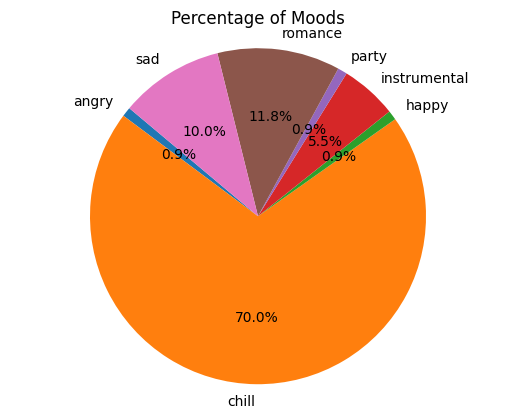

Songs that have the angry mood


['Annaaththe Aaduraar']



Songs that have the chill mood


['Mannil Indha',
 'Ennodu Paattu Paadungal',
 'Pesa Koodathu',
 'Raja Raja Chozhan',
 'Kanne Kalaimaane',
 'Thenmadurai Vaigai Nadhi',
 'Nilaave Vaa',
 'Rasathi Unnai',
 'Enna Saththam Indha Neram',
 'Yedhedho Ennam Valarthen',
 'Valaiyosai',
 'Oru Koottu',
 'Panivizhum Iravu',
 'Poo Maalayae',
 'Un Paarvayil - Male',
 'Keladi Kanmani',
 'Guruvayurappa',
 'Nee Pathi Naan Pathi',
 'Ennai Thottu',
 'Puthu Maappillaikku',
 'Vaanile Thenila',
 'Medhuva Medhuva (From "Anna Nagar Modul Theru")',
 'Pachamala Poovu',
 'Paadi Parandha',
 'Rum Bum Bum Arambum',
 'Meenamma Meenamma',
 'Oru Jeevan (Happy)',
 'Marugo Marugo',
 'Vaa Vaa Anbe',
 'Kandu Pudichen',
 'Vaan Megam Poo Poovaai',
 'Kaala Kaalamaaga Vaazhum',
 'Vaa Vaa Vanji',
 'Aasai Nooruvagai',
 'Ilamai Ennum Poonkaatru',
 'Poove Sem Poove - Male',
 'Aasai Athigam (From "Marupadiyum")',
 'Thendral Vandhu Theendumbothu (From "Avathaaram")',
 'Keeravani',
 'Maanin Iru Kangal',
 'Engirundho Ilangkuyilin (From "Brhamma")',
 'Kodiyile Malliyap



Songs that have the happy mood


['Oruvan Oruvan Mudalali']



Songs that have the instrumental mood


['Punnagai Mannan - Theme Music',
 'Kalyaana Maalai',
 'Unna Nenachen',
 'Ennathaan Sugamo',
 'Avalukkenna',
 'Kodutthathellam Kodutthan']



Songs that have the party mood


['Yennama Kannu Sowkiyama']



Songs that have the romance mood


['Sangeetha Megam',
 'Aalappol Velappol (From "Yejaman")',
 'Thooliyile Ada Vantha - Male Version',
 'Oru Naalum (From "Yejaman")',
 'Oorai Therinchikitten',
 'Chinnamani Kuyile',
 'Malai Kovil Vaasalil (From "Veera")',
 'Pottu Vaitha Oru Vatta Nila (From "Idhayam")',
 'Aaradi Chuvaruthaan',
 'Vellai Pura Ondru (Solo)',
 'Va Va Va Kanna',
 'Ennavendru Solvathamma',
 'Ennai Thottu']



Songs that have the sad mood


['Malaiyoram Veesum Kaathu',
 'Kaathalin Deepam Ondru - Male version',
 'Thenpandi Cheemayile',
 'Kuyila Pudichchu',
 'Thedum Kann Paarvai',
 'Sundari',
 'En Iniya Pon Nilave Pon',
 'Poongodithan Poothathamma (From "Idhayam")',
 'Kanmani Anbodu (From "Gunaa")',
 'Shenbagame Shenbagame - Male Version',
 'En Kanmani']

In [157]:
output(trial, fin_model)